---
title: "Hydraulisch Belastingsniveau (HBN)"
execute:
  echo: false
---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pydra_core as pydra

<h3>Opzet profiel en uitvoerpunt</h3>

Als demonstratie worden HBNs voor de Borselle (Westerschelde/Kust) bepaald voor uitvoerpunt 'WS_1_30-4_dk_00002'. Voor het traject geldt een norm van 1/1.000.000 per jaar vanwege de kerncentrale Borselle.

Eerst maken we een nieuwe profiel aan. We nemen een 1 op 3 talud met de kruinhoogte op NAP+10,75m en een dijknormaal van 225 graden. Hieronder is de code weergegeven. Voor meer informatie over het schematiseren van profielen zie notebook '02. Profielen.ipynb'.

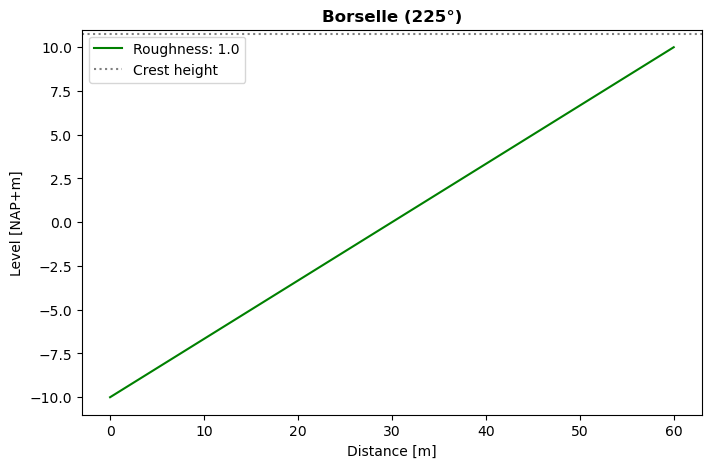

In [3]:
# Maak profiel
profile = pydra.Profile("Borselle")
profile.set_dike_crest_level(10.75)
profile.set_dike_orientation(225)
profile.set_dike_geometry([-30, 30], [-10, 10])

# Controle plot
profile.draw_profile()

Nu we het profiel geschematiseerd hebben, gaan we het uitvoerpunt initialiseren. Hieronder is de code weergegeven met enkele comments. Voor een uitgebreidere beschrijving van het opzetten van een uitvoerpunt zie notebook '01. Overschrijdingsfrequentielijnen.ipynb'.

In [4]:
import warnings

warnings.filterwarnings("ignore")  # future warnings are annoying

# HRDatabase
DB_PATH = "data/WBI2017_Westerschelde_30-4_v03.sqlite"
hrdatabase = pydra.HRDatabase(DB_PATH)

# Maak nieuw uitvoerpunt aan met standaard settings
location = hrdatabase.get_location("WS_1_30-4_dk_00002")
# TODO: deze error beter afvangen:

ERROR: Execution failed on sql '
                    SELECT ucf.HRDLocationId, ucf.ClosingSituationId, hrv.ResultVariableId, ucf.HRDResultColumnId2, ucf.Correlation
                    FROM UncertaintyCorrelationFactor ucf
                    INNER JOIN HRDResultVariables hrv
                    ON ucf.HRDResultColumnId = hrv.HRDResultColumnId
                    WHERE ucf.HRDLocationId = 146
                    ': no such table: UncertaintyCorrelationFactor, continuing without correlation


In [18]:
location.settings

database_path                  = data/WBI2017_Westerschelde_30-4_v03.sqlite
location                       = WS_1_30-4_dk_00002
m_max                          = 9.0
m_step                         = 0.1
model_uncertainty_water_level_steps = 7
model_uncertainty_wave_height_steps = 5
model_uncertainty_wave_period_steps = 5
periods_block_duration         = 360.0
region                         = 5.0
sea                            = 11.0
sea_level_probability_point1   = Zeewaterstand\Vlissingen\CondPovVlissingen_12u_zichtjaar2017_metOnzHeid.txt
sea_level_probability_point2   = Zeewaterstand\Hansweert\CondPovHansweert_12u_zichtjaar2017_metOnzHeid.txt
sea_level_probability_point3   = Zeewaterstand\Vlissingen virtueel\CondPovVlissingen-Additional_12u_zichtjaar2017_metOnzHeid.txt
sea_level_rise                 = 0.0
sigma_function                 = Sigmafunctie\Westerschelde\VS_sigmafunctie_WS_2017.txt
u_max                          = 55.0
u_repair                       = True
u_step            

Hierboven gebruiken we <i>get_location("WS_1_30-4_dk_00002")</i> om een uitvoerpunt aan te maken. Dit wijkt af van wat in notebook 01 is beschreven. In notebook 01 gebruiken we eerst <i>settings = get_settings("WS_1_30-4_dk_00002")</i> om een settings object te definieren en vervolgens <i>location = create_location(settings)</i> om een locatie aan te maken. Door het gebruik van <i>location = get_location("WS_1_30-4_dk_00002")</i> worden beide functies direct uitgevoerd. Dit geeft geen mogelijkheid om vooraf settings aan te passen.

Nu voegen we het eerder gedefinieerde profiel 'profile' toe aan 'location' door middel van de functie <i>set_profile(Profile)</i>.

In [5]:
# Voeg een profiel toe
location.set_profile(profile)

# Overschrijf profiel
# location.set_profile(another_profile)

# Verwijder profiel
# location.remove_profile()

In [15]:
location.get_profile()

Je kan een profiel overschrijven door de <i>set_profile(Profile)</i> opnieuw te gebruiken. Je kan een profiel verwijderen door <i>remove_profile()</i> aan te roepen.

<h3>HBNs berekenen</h3>

Om HBNs te berekenen gebruiken we het <i>HBN</i> rekenobject. Het HBN rekenobject heeft vier optionele argumenten:
<lu>
    <li>q_overtopping (standaard 0.01 m3/m/s): Het kritische overslagdebiet.</li>
    <li>levels (standaard None): Vooraf opgegeven hoogten. Indien deze None is berekent pydra de HBNs voor een kruinhoogte vanaf de 1% percentiel van de waterstand tot en met de 99% percentiel van de waterstand + 4x de 99% percentiel van de significante golfhoogte.</li>
    <li>step_size (standaard 0.05): De stapgrootte van de stapjes waar pydra de HBN voor doorrekend.</li>
    <li>model_uncertainty (standaard True): Wel of niet toepassen van modelonzekerheid.</li>
</lu>

In [6]:
# Initieer het HBN rekenobject
hbn = pydra.HBN(0.01)
hbn.set_levels(np.arange(0.0, 15.0, 0.05))

Vervolgens kunnen we met het rekenobject <i>hbn</i> een overschrijdingsfrequentielijn bepalen voor HR uitvoerpunt 'WS_1_30-4_dk_00002' door de <i>calculate()</i> functie aan te roepen van het rekenobject en het <i>location</i> object als argument mee te geven.

In [7]:
hbn_borselle = hbn.calculate(location)

[16:57:20]: Model uncertainties 1/25 (fhs = 0.558; ftspec = 0.71; p = 0.002)
[16:57:20]: Model uncertainties 2/25 (fhs = 0.558; ftspec = 0.835; p = 0.011)
[16:57:20]: Model uncertainties 3/25 (fhs = 0.558; ftspec = 0.96; p = 0.019)
[16:57:20]: Model uncertainties 4/25 (fhs = 0.558; ftspec = 1.085; p = 0.011)
[16:57:20]: Model uncertainties 5/25 (fhs = 0.558; ftspec = 1.21; p = 0.002)
[16:57:20]: Model uncertainties 6/25 (fhs = 0.774; ftspec = 0.71; p = 0.011)
[16:57:20]: Model uncertainties 7/25 (fhs = 0.774; ftspec = 0.835; p = 0.058)
[16:57:20]: Model uncertainties 8/25 (fhs = 0.774; ftspec = 0.96; p = 0.104)
[16:57:20]: Model uncertainties 9/25 (fhs = 0.774; ftspec = 1.085; p = 0.058)
[16:57:20]: Model uncertainties 10/25 (fhs = 0.774; ftspec = 1.21; p = 0.011)
[16:57:20]: Model uncertainties 11/25 (fhs = 0.99; ftspec = 0.71; p = 0.019)
[16:57:20]: Model uncertainties 12/25 (fhs = 0.99; ftspec = 0.835; p = 0.104)
[16:57:20]: Model uncertainties 13/25 (fhs = 0.99; ftspec = 0.96; p = 

Dit geeft een overschrijdingsfrequentielijn <i>hbn_borselle</i>. Het is een object waarin de berekende gegevens (HBN en overschrijdingsfrequenties) worden opgeslagen. Als je het object print, zie je wat er allemaal in zit.

In [8]:
print(hbn_borselle)

FrequencyLine(level=array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,


Hieronder is een plot van de berekende overschrijdingsfrequentielijn gegeven.

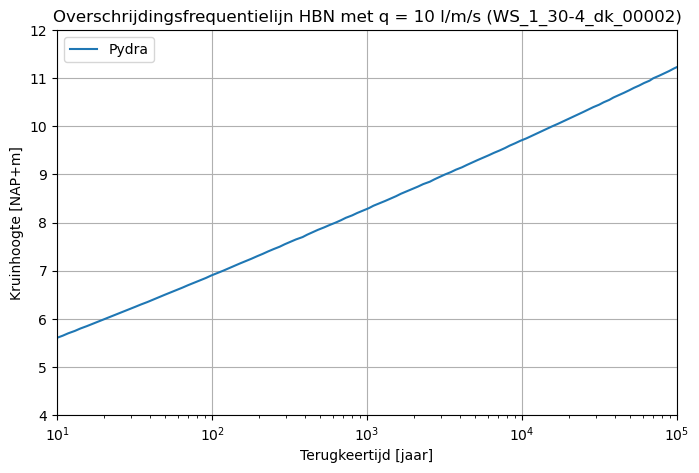

In [9]:
plt.figure(figsize=[8, 5])
plt.grid()
plt.plot(
    1 / np.array(hbn_borselle.exceedance_frequency), hbn_borselle.level, label="Pydra"
)
plt.legend(loc="upper left")
plt.title("Overschrijdingsfrequentielijn HBN met q = 10 l/m/s (WS_1_30-4_dk_00002)")
plt.xscale("log")
plt.xticks([10, 100, 1_000, 10_000, 100_000])
plt.xlabel("Terugkeertijd [jaar]")
plt.xlim(10, 100_000)
plt.ylabel("Kruinhoogte [NAP+m]")
plt.ylim(4, 12)
plt.show()

En een vergelijking met Hydra-NL.

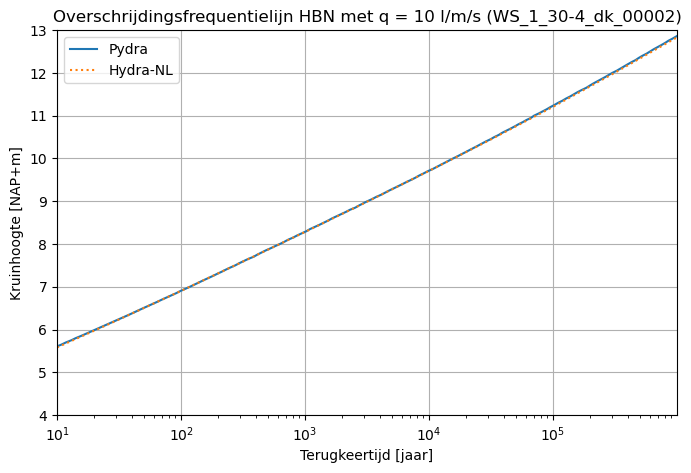

In [10]:
hydranl_tt = np.array(
    [10, 30, 100, 300, 1_000, 3_000, 10_000, 30_000, 100_000, 300_000, 1_000_000]
)
hydranl_hbn = np.array(
    [5.582, 6.206, 6.904, 7.558, 8.282, 8.955, 9.71, 10.412, 11.207, 11.969, 12.831]
)

plt.figure(figsize=[8, 5])
plt.grid()
plt.plot(
    1 / np.array(hbn_borselle.exceedance_frequency), hbn_borselle.level, label="Pydra"
)
plt.plot(hydranl_tt, hydranl_hbn, ":", label="Hydra-NL")
plt.legend(loc="upper left")
plt.title("Overschrijdingsfrequentielijn HBN met q = 10 l/m/s (WS_1_30-4_dk_00002)")
plt.xscale("log")
plt.xticks([10, 100, 1_000, 10_000, 100_000])
plt.xlabel("Terugkeertijd [jaar]")
plt.xlim(10, 10_00_000)
plt.ylabel("Kruinhoogte [NAP+m]")
plt.ylim(4, 13)
plt.show()

<h3>HBNs voor een heel traject</h3>

Zoals in notebook '01. Overschrijdingsfrequentielijnen' uitgelegd, is het mogelijk om voor alle uitvoerpunten in een database een batch berekening uit te voeren. Voor het bepalen van HBN's kan dit ook, in dit geval worden dan alle locaties waar nog geen profiel aan verbonden is overgeslagen. Voor meer informatie over batch berekeningen zie notebook '01. Overschrijdingsfrequentielijnen'.

In [11]:
import warnings

warnings.filterwarnings("ignore")  # future warnings are annoying
# Voor de vorm voegen we ons eerder gedefinieerde profiel ook toe aan WS_1_30-4_dk_00001 en WS_1_30-4_dk_00003
tmp_location = hrdatabase.get_location("WS_1_30-4_dk_00001")
tmp_location.set_profile(profile)
tmp_location = hrdatabase.get_location("WS_1_30-4_dk_00003")
tmp_location.set_profile(profile)

# Bereken de HBNs voor uitvoerpunten die een profiel hebben
alle_hbns = hbn.calculate(hrdatabase)
# TODO: deze error beter afvangen:

ERROR: Execution failed on sql '
                    SELECT ucf.HRDLocationId, ucf.ClosingSituationId, hrv.ResultVariableId, ucf.HRDResultColumnId2, ucf.Correlation
                    FROM UncertaintyCorrelationFactor ucf
                    INNER JOIN HRDResultVariables hrv
                    ON ucf.HRDResultColumnId = hrv.HRDResultColumnId
                    WHERE ucf.HRDLocationId = 147
                    ': no such table: UncertaintyCorrelationFactor, continuing without correlation
ERROR: Execution failed on sql '
                    SELECT ucf.HRDLocationId, ucf.ClosingSituationId, hrv.ResultVariableId, ucf.HRDResultColumnId2, ucf.Correlation
                    FROM UncertaintyCorrelationFactor ucf
                    INNER JOIN HRDResultVariables hrv
                    ON ucf.HRDResultColumnId = hrv.HRDResultColumnId
                    WHERE ucf.HRDLocationId = 145
                    ': no such table: UncertaintyCorrelationFactor, continuing without correlation
ERROR: Exe

Omdat we nu een heel traject doorrekenen, zal <i>calculate()</i> niet één frequentielijn returnen. In plaats daarvan wordt een dictionary gereturnd met als key de naam van het uitvoerpunt en als value het <i>FrequencyLine</i> resultaat object. Als er geen HBN berekent is, is de waarde in de dictionary <i>None</i>.

In [12]:
print(alle_hbns)

{'WS_1_30-4_dk_00006': None, 'WS_2_30-4_dk_00005': None, 'WS_1_30-4_dk_00004': None, 'WS_1_30-4_dk_00003': FrequencyLine(level=array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55

Een overzicht van alle resultaten:

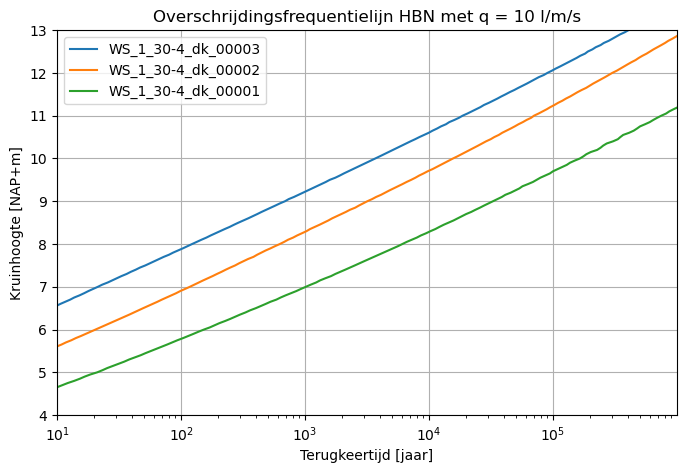

In [13]:
plt.figure(figsize=[8, 5])
plt.grid()

for _loc in alle_hbns:
    if alle_hbns[_loc] is not None:
        plt.plot(
            1 / alle_hbns[_loc].exceedance_frequency, alle_hbns[_loc].level, label=_loc
        )

plt.legend(loc="upper left")
plt.title("Overschrijdingsfrequentielijn HBN met q = 10 l/m/s")
plt.xscale("log")
plt.xticks([10, 100, 1_000, 10_000, 100_000])
plt.xlabel("Terugkeertijd [jaar]")
plt.xlim(10, 10_00_000)
plt.ylabel("Kruinhoogte [NAP+m]")
plt.ylim(4, 13)
plt.show()